In this notebook we fit a decision tree (https://scikit-learn.org/stable/modules/tree.html#tree) and random forests (https://scikit-learn.org/stable/modules/ensemble.html#forest) to the iris dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

Load the iris data, separate independent (X) and dependent (y) variables, and then keep only the first two features (because we are going to plot on a 2D image).

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
data_train, data_test, label_train, label_test = model_selection.train_test_split(X, y)

Fit a decision tree.

In [4]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(data_train, label_train)

DecisionTreeClassifier()

Fit some random forests.

In [5]:
forests = []
for x in range(1, 10):
    clf_forest = RandomForestClassifier(n_estimators=1)
    clf_forest.fit(data_train, label_train)
    forests.append(clf_forest)

Predict for all.

In [6]:
label_pred_tree = clf_tree.predict(data_test)
label_pred_forests = []
for clf_forest in forests:
    label_pred_forests.append(clf_forest.predict(data_test))

Tree:
0.9736842105263158
[[ 8  0  0]
 [ 0 15  1]
 [ 0  0 14]]


[Text(0.625, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.664\nsamples = 112\nvalue = [42, 34, 36]'),
 Text(0.5, 0.7857142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.75, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.625, 0.6428571428571429, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.5, 0.5, 'X[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.25, 0.35714285714285715, 'X[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.21428571428571427, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.35714285714285715, 'X[2] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.625, 0.2

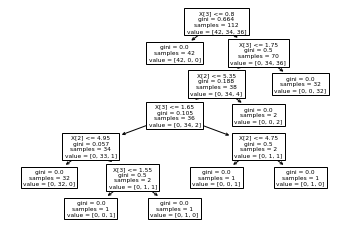

In [7]:
print("Tree:")
print(metrics.accuracy_score(label_test, label_pred_tree))
print(metrics.confusion_matrix(label_test, label_pred_tree))
tree.plot_tree(clf_tree)

In [8]:
print("Forest:")
for i, preds in enumerate(label_pred_forests):
    print("number of forests", str(i+1))
    print(metrics.accuracy_score(label_test, preds))
    print(metrics.confusion_matrix(label_test, preds))

Forest:
number of forests 1
0.9473684210526315
[[ 8  0  0]
 [ 0 15  1]
 [ 0  1 13]]
number of forests 2
0.9473684210526315
[[ 8  0  0]
 [ 0 15  1]
 [ 0  1 13]]
number of forests 3
0.8157894736842105
[[ 8  0  0]
 [ 0 13  3]
 [ 0  4 10]]
number of forests 4
0.9736842105263158
[[ 8  0  0]
 [ 0 15  1]
 [ 0  0 14]]
number of forests 5
0.868421052631579
[[ 8  0  0]
 [ 0 12  4]
 [ 0  1 13]]
number of forests 6
0.9736842105263158
[[ 8  0  0]
 [ 0 15  1]
 [ 0  0 14]]
number of forests 7
0.9473684210526315
[[ 8  0  0]
 [ 0 16  0]
 [ 0  2 12]]
number of forests 8
0.9736842105263158
[[ 8  0  0]
 [ 0 15  1]
 [ 0  0 14]]
number of forests 9
0.9473684210526315
[[ 8  0  0]
 [ 0 15  1]
 [ 0  1 13]]


What are the feature importances for the decision tree?

In [9]:
import pandas as pd
feature_imp = pd.Series(clf_tree.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal width (cm)     0.928436
petal length (cm)    0.071564
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float64

- What are the hyperparameters for the decision tree implementation?
- What are the hyperparameters for the random forest implementation?
- What happens if you resplit the data?
- How can you visualize a random forest (see https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn)